scikit-gardenのテスト

In [2]:
# import the boston house-prices datase for regression
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
dataset = load_boston()
from sklearn.model_selection import train_test_split

# set dataframe
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['MEDV'])

# 交差検証(holdout)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


#データセットを5つに分ける
X1 = X_train.iloc[:100,:]
y1 = y_train.iloc[:100,:]
X2 = X_train.iloc[100:200,:]
y2 = y_train.iloc[100:200,:]
X3 = X_train.iloc[200:300,:]
y3 = y_train.iloc[200:300,:]
X4 = X_train.iloc[300:,:]
y4 = y_train.iloc[300:,:]

# check the shape
print('----------------------------------------------------------------------------------------')
print('X shape: (%i,%i)' %X.shape)
print('y shape: (%i,%i)' %y.shape)
print('----------------------------------------------------------------------------------------')
print('X1 shape: (%i,%i)' %X1.shape)
print('y1 shape: (%i,%i)' %y1.shape)
print('----------------------------------------------------------------------------------------')
print('X2 shape: (%i,%i)' %X2.shape)
print('y2 shape: (%i,%i)' %y2.shape)
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('X3 shape: (%i,%i)' %X3.shape)
print('y3 shape: (%i,%i)' %y3.shape)
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('X4 shape: (%i,%i)' %X4.shape)
print('y4 shape: (%i,%i)' %y4.shape)

print('----------------------------------------------------------------------------------------')
print(y.describe())
print('----------------------------------------------------------------------------------------')
print(X.join(y).head())
print('----------------------------------------------------------------------------------------')
print(dataset.DESCR)


----------------------------------------------------------------------------------------
X shape: (506,13)
y shape: (506,1)
----------------------------------------------------------------------------------------
X1 shape: (100,13)
y1 shape: (100,1)
----------------------------------------------------------------------------------------
X2 shape: (100,13)
y2 shape: (100,1)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
X3 shape: (100,13)
y3 shape: (100,1)
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
X4 shape: (104,13)
y4 shape: (104,1)
----------------------------------------------------------------------------------------
             MEDV
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.0250

In [3]:
# import libraries
from skgarden.mondrian.ensemble import MondrianForestRegressor


# build the model
mfr = MondrianForestRegressor()
mfr.fit(X1,y1.as_matrix().ravel())

# check the model performance by R2 socre
from sklearn.metrics import r2_score
y1_true = y_test.as_matrix().ravel()
y1_pred = mfr.predict(X_test)
r2 = r2_score(y1_true, y1_pred)
print('R2 score of the descriptive model: %.3f' % r2)

R2 score of the descriptive model: 0.547


とりあえず、sklearnと同じ形で動作することは確認できた。
ここから果たしてupdateできるのかという実験

In [4]:
mfr.partial_fit(X2,y2.as_matrix().ravel())

from sklearn.metrics import r2_score
y2_true = y_test.as_matrix().ravel()
y2_pred = mfr.predict(X_test)
r2 = r2_score(y2_true, y2_pred)
print('R2 score of the descriptive model: %.3f' % r2)

R2 score of the descriptive model: 0.405


In [5]:
mfr.partial_fit(X3,y3.as_matrix().ravel())

from sklearn.metrics import r2_score
y3_true = y_test.as_matrix().ravel()
y3_pred = mfr.predict(X_test)
r2 = r2_score(y3_true, y3_pred)
print('R2 score of the descriptive model: %.3f' % r2)

R2 score of the descriptive model: 0.528


In [6]:
mfr.partial_fit(X4,y4.as_matrix().ravel())

from sklearn.metrics import r2_score
y4_true = y_test.as_matrix().ravel()
y4_pred = mfr.predict(X_test)
r2 = r2_score(y4_true, y4_pred)
print('R2 score of the descriptive model: %.3f' % r2)

R2 score of the descriptive model: 0.618


In [7]:
#全体でやってみる。
mfr2 = MondrianForestRegressor()
mfr2.fit(X_train,y_train.as_matrix().ravel())

from sklearn.metrics import r2_score
y_true = y_test.as_matrix().ravel()
y_pred = mfr2.predict(X_test)
r2 = r2_score(y_true, y_pred)
print('R2 score of the descriptive model: %.3f' % r2)

R2 score of the descriptive model: 0.640


徐々にスコアが上がることを確認できた。
とりあえず、このテストでは合格かと。

In [8]:
#RandomForestとGradientBoostingと比べる。
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

rfr.fit(X_train,y_train.as_matrix().ravel())
gbr.fit(X_train,y_train.as_matrix().ravel())

r2r = r2_score(y_test.as_matrix().ravel(), rfr.predict(X_test))
print('R2 score of the RandomForest model: %.3f' % r2r)
r2g = r2_score(y_test.as_matrix().ravel(), gbr.predict(X_test))
print('R2 score of the GradientBoosting model: %.3f' % r2g)

R2 score of the RandomForest model: 0.865
R2 score of the GradientBoosting model: 0.910


データ数が少ないのでなんとも言えないが、懸念は精度が低い可能性がある。
少なくともデータ数が少ないと思ったより精度がでない。

#　変数重要度を出せるかどうか。
MondrianForestRegressorはsklearnのForestRegressorと、BaseMondrianのクラスを継承してるので、ForestRegresssorに変数重要度の奴があるはず。

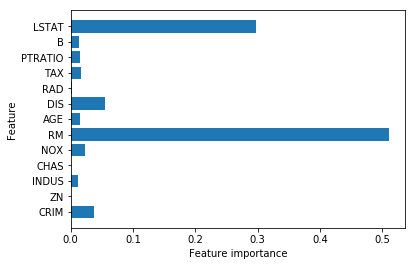

In [11]:
import matplotlib.pyplot as plt
def plot_feature_importances_dataset(model):
    n_features = dataset.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),dataset.feature_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

#動作テスト
plot_feature_importances_dataset(rfr)
#plot_feature_importances_dataset(mfr)

feature_importances_がないみたい。